In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
def load_data(file_path):
  with open(file_path, 'r') as f:
    data = f.read()
  return data

file_path = 'hp_1.txt'
text = load_data(file_path).lower()

In [ ]:
text

"m r. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much. they were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.\n\nmr. dursley was the director of a firm called grunnings, which made drills. he was a big, beefy man with hardly any neck, although he did have a very large mustache. mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere.\n\nthe dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. they didn’t think they could bear it if anyone found out about the potters. mrs. potter was mrs. dursley’s sister, but they hadn’t met for sever

In [ ]:
#Tokenization

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts([text])

total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)

print(total_words)

{'<OOV>': 1, 'the': 2, '”': 3, 'and': 4, 'to': 5, 'a': 6, 'he': 7, 'of': 8, 'harry': 9, 'was': 10, 'it': 11, 'in': 12, 'his': 13, 'you': 14, 'said': 15, '—': 16, 'had': 17, 'on': 18, 'at': 19, 'that': 20, 'they': 21, 'as': 22, 'him': 23, 'i': 24, 'with': 25, 'but': 26, 'ron': 27, 'all': 28, 'out': 29, 'up': 30, 'for': 31, 'be': 32, 'them': 33, 'hagrid': 34, 'were': 35, 'have': 36, 'what': 37, 'there': 38, 'back': 39, 'hermione': 40, 'one': 41, 'from': 42, 'this': 43, 'not': 44, 'if': 45, 'she': 46, 'about': 47, 'into': 48, 'their': 49, 'been': 50, 'me': 51, 'know': 52, 'so': 53, 'off': 54, 'didn’t': 55, 'like': 56, 'could': 57, 'got': 58, 'get': 59, 'her': 60, 'down': 61, 'when': 62, 'over': 63, 'who': 64, 'looked': 65, '“i': 66, 'professor': 67, 'just': 68, 'very': 69, 'see': 70, 'is': 71, 'then': 72, 'no': 73, 'by': 74, 'do': 75, 'are': 76, 'your': 77, 'around': 78, 'now': 79, 'dumbledore': 80, 'he’d': 81, 'snape': 82, 'going': 83, 'an': 84, 'something': 85, 'through': 86, 'think': 8

In [ ]:
input_sequences = []
tokens = tokenizer.texts_to_sequences([text])[0]

print(tokens)


[2162, 3680, 4, 274, 224, 8, 651, 332, 652, 535, 35, 1268, 5, 164, 20, 21, 35, 1586, 973, 1587, 14, 69, 157, 21, 35, 2, 141, 128, 653, 789, 5, 32, 1588, 12, 169, 490, 110, 1416, 142, 21, 68, 55, 909, 25, 505, 1788, 151, 224, 10, 2, 2701, 8, 6, 2702, 275, 2703, 140, 183, 1417, 7, 10, 6, 394, 3681, 333, 25, 491, 191, 593, 974, 7, 131, 36, 6, 69, 233, 1418, 274, 224, 10, 975, 4, 2704, 4, 17, 343, 689, 2, 594, 3682, 8, 593, 140, 159, 12, 69, 1789, 22, 46, 910, 53, 157, 8, 60, 89, 2705, 63, 1419, 3683, 2163, 18, 2, 2706, 2, 287, 17, 6, 356, 1090, 275, 93, 4, 12, 49, 1589, 38, 10, 73, 2707, 146, 1269, 2, 287, 17, 383, 21, 276, 26, 21, 690, 17, 6, 691, 4, 49, 1590, 976, 10, 20, 2164, 107, 3684, 11, 21, 55, 87, 21, 57, 1591, 11, 45, 327, 179, 29, 47, 2, 911, 274, 117, 10, 274, 2708, 731, 26, 21, 221, 564, 31, 790, 234, 12, 692, 274, 224, 2165, 46, 55, 36, 6, 731, 142, 60, 731, 4, 60, 165, 31, 249, 3685, 35, 22, 3686, 22, 11, 10, 848, 5, 32, 2, 287, 2166, 5, 87, 37, 2, 2706, 107, 164, 45, 2, 91

In [ ]:
sq_len = 50

for i in range(sq_len, len(tokens)):
  seq = tokens[i-sq_len:i+1]
  input_sequences.append(seq)

input_sequences = np.array(input_sequences)

In [ ]:
len(input_sequences[0])
print(input_sequences[0])

[2162 3680    4  274  224    8  651  332  652  535   35 1268    5  164
   20   21   35 1586  973 1587   14   69  157   21   35    2  141  128
  653  789    5   32 1588   12  169  490  110 1416  142   21   68   55
  909   25  505 1788  151  224   10    2 2701]


In [ ]:
from tensorflow.keras.utils import pad_sequences, to_categorical

input_sequences = np.array(pad_sequences(input_sequences, maxlen=sq_len+1, padding='pre'))
X = input_sequences[:,:-1] # value till last
Y = input_sequences[:,-1] # last value

In [ ]:
Y = tf.keras.utils.to_categorical(Y, num_classes=total_words)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM

In [ ]:
model = Sequential([
    Embedding(input_dim = total_words, output_dim=64, input_length=sq_len),
    SimpleRNN(254),
    Dense(256, activation='relu'),
    Dense(total_words, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_model = model.fit(X,Y, epochs=10, batch_size=128 )

Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.0410 - loss: 6.9369
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0604 - loss: 6.2735
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0990 - loss: 5.8182
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1176 - loss: 5.5100
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1323 - loss: 5.2503
Epoch 6/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1415 - loss: 5.0233
Epoch 7/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1549 - loss: 4.8032
Epoch 8/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1643 - loss: 4.5918
Epoch 9/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1744 - loss: 4.3919
Epoch 10/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1850 - loss: 4.1971


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 64)         │       426,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 254)            │        81,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6663)           │     1,712,391 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,855,389 (26.15 MB)

 Trainable params: 2,285,129 (8.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,570,260 (17.43 MB)

In [ ]:
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sq_len, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs)
        predicted_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                predicted_word = word
                break
        seed_text += " " + predicted_word
    return seed_text

# Example of using the generate_text function
print(generate_text("harry looked at", next_words=25))

harry looked at him and they were a lot of the school of the school of the bludgers ” said harry in a large halt a neat camera


In [ ]:
model1 = Sequential([
    Embedding(input_dim=total_words, output_dim=100, input_length=sq_len),
    LSTM(256, return_sequences=True),
    LSTM(256),
    Dense(total_words, activation='softmax')
])

In [ ]:
model1.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
history_model1 = model1.fit(X, Y, epochs=10, batch_size=128)

Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.0412 - loss: 7.0516
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.0519 - loss: 6.3754
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.0745 - loss: 6.0632
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.1013 - loss: 5.7396
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.1142 - loss: 5.5141
Epoch 6/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.1239 - loss: 5.3071
Epoch 7/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.1345 - loss: 5.1127
Epoch 8/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.1437 - loss: 4.9293
Epoch 9/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.1486 - loss: 4.7848
Epoch 10/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.1573 - loss: 4.6203


In [ ]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 100)        │       666,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50, 256)        │       365,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6663)           │     1,712,391 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,808,715 (37.42 MB)

 Trainable params: 3,269,571 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,539,144 (24.94 MB)

In [ ]:
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sq_len, padding='pre')
        predicted_probs = model1.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs)
        predicted_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                predicted_word = word
                break
        seed_text += " " + predicted_word
    return seed_text

# Example of using the generate_text function
print(generate_text("harry looked at", next_words=25))

harry looked at the world ” said harry “i don’t know what ” said harry “i don’t know what ” said harry “i don’t know what ” said


In [ ]:
loss_rnn, test_acc_rnn = model.evaluate(X, Y, verbose=0)
loss_lstm, test_acc_lstm = model1.evaluate(X, Y, verbose=0)


--- Model Comparison ---
SimpleRNN (model) Test Accuracy: 0.2094
LSTM (model1) Test Accuracy:      0.1691


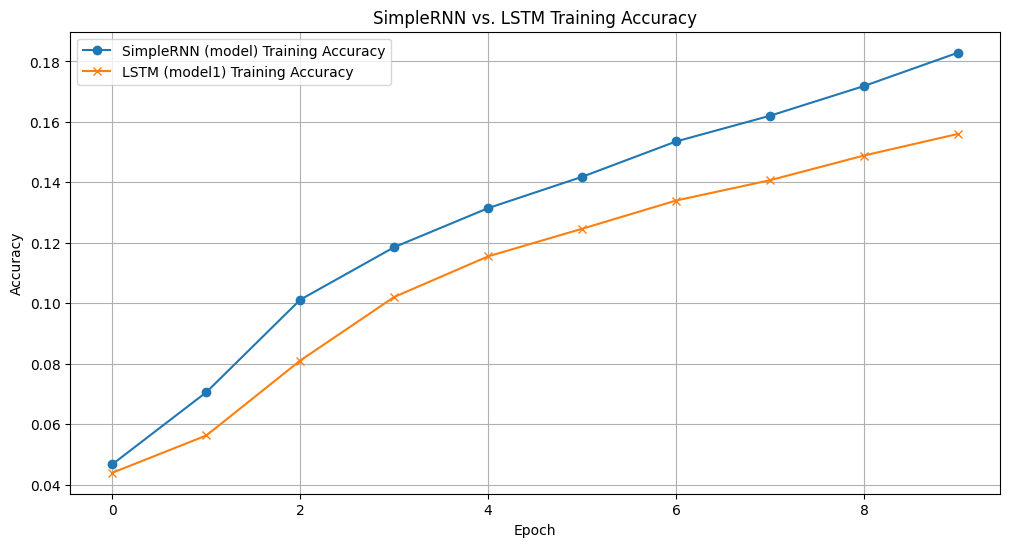

In [ ]:
import matplotlib.pyplot as plt

print("\n--- Model Comparison ---")
print(f"SimpleRNN (model) Test Accuracy: {test_acc_rnn:.4f}")
print(f"LSTM (model1) Test Accuracy:      {test_acc_lstm:.4f}")



plt.figure(figsize=(12, 6))
plt.plot(history_model.history['accuracy'], label='SimpleRNN (model) Training Accuracy', marker='o')
plt.plot(history_model1.history['accuracy'], label='LSTM (model1) Training Accuracy', marker='x')
plt.title('SimpleRNN vs. LSTM Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()